<a href="https://colab.research.google.com/github/Mo-Alshebli/Mr-Amazing-/blob/main/%D9%86%D8%B3%D8%AE%D8%A9_%D9%85%D9%86_Copy_of_%D8%A7%D9%84%D9%88%D8%B1%D8%B4%D8%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## دورة حياة مشاريع الذكاء الاصطناعي

### جمع البيانات

In [ ]:
# 1. Definition of the Problem
# The objective is to classify patients into different drug types based on their characteristics.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [ ]:
# 2. Data Collection
data = pd.read_csv('/content/drive/MyDrive/الورشة/drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### تنظيف البيانات وتجهيزها

In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
data.isna().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# Copy code
# 1. Handle Missing Values
# For categorical columns, fill with mode
for column in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    mode_val = data[column].mode()[0]
    data[column].fillna(mode_val, inplace=True)

# For numerical columns, fill with median
for column in ['Age', 'Na_to_K']:
    median_val = data[column].median()
    data[column].fillna(median_val, inplace=True)

In [ ]:
data.isna().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

# 1. Handle Missing Values: Using mean for numerical columns and most frequent for categorical columns
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Numerical columns
data['Age'] = num_imputer.fit_transform(data[['Age']])
data['Na_to_K'] = num_imputer.fit_transform(data[['Na_to_K']])

# Categorical columns
data['Sex'] = cat_imputer.fit_transform(data[['Sex']])
data['BP'] = cat_imputer.fit_transform(data[['BP']])
data['Cholesterol'] = cat_imputer.fit_transform(data[['Cholesterol']])
data['Drug'] = cat_imputer.fit_transform(data[['Drug']])
data.isna().sum()


Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace=True)


In [ ]:
data.duplicated().sum()

0

In [ ]:
data['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:

# 5. Handle Typos
# Correct known typos in the Sex and Cholesterol columns
data['Sex'] = data['Sex'].replace({'Famale': 'F', 'Mael': 'M'})
data['Cholesterol'] = data['Cholesterol'].replace({'NORMAAL': 'NORMAL'})



In [ ]:
data['Sex'].unique()

array(['F', 'M'], dtype=object)

In [ ]:



# sex_mapping = {'Famale': 'F', 'Mael': 'M'}
# dirty_data['Sex'] = dirty_data['Sex'].replace(sex_mapping)

# cholesterol_mapping = {'NORMAAL': 'NORMAL'}
# dirty_data['Cholesterol'] = dirty_data['Cholesterol'].replace(cholesterol_mapping)

In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Create a copy of the data to apply label encoding
data_label_encoded = data.copy()

# Apply LabelEncoder to the categorical columns
data['Sex'] = le.fit_transform(data['Sex'])
data['BP'] = le.fit_transform(data['BP'])
data['Cholesterol'] = le.fit_transform(data['Cholesterol'])
data['Drug'] = le.fit_transform(data['Drug'])

data.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,0,0,0,25.355,0
1,47.0,1,1,0,13.093,3
2,47.0,1,1,0,10.114,3
3,28.0,0,2,0,7.798,4
4,61.0,0,1,0,18.043,0


In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# ## Initialize OneHotEncoder and specify that we want a dense output
# encoder = OneHotEncoder(sparse=False)

# # Fit and transform the categorical columns
# encoded_features_sklearn = encoder.fit_transform(data[['Sex', 'BP', 'Cholesterol']])

# # Get feature names after one-hot encoding
# encoded_feature_names_sklearn = encoder.get_feature_names_out(['Sex', 'BP', 'Cholesterol'])

# # Convert the encoded features to a DataFrame
# encoded_df_sklearn = pd.DataFrame(encoded_features_sklearn, columns=encoded_feature_names_sklearn)

# # Drop the original categorical columns and concatenate the encoded DataFrame
# data_onehot_encoded_sklearn = pd.concat([data.drop(['Sex', 'BP', 'Cholesterol'], axis=1), encoded_df_sklearn], axis=1)

# data_onehot_encoded_sklearn.head()
# data=data_onehot_encoded_sklearn
# data

In [ ]:
data.to_csv("/content/drive/MyDrive/الورشة/Clean_data",index=False)

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/الورشة/Clean_data')


                  Age       Sex        BP  Cholesterol   Na_to_K      Drug
Age          1.000000  0.102027  0.054212    -0.068234 -0.063119  0.041856
Sex          0.102027  1.000000 -0.007814    -0.008811 -0.125008  0.018239
BP           0.054212 -0.007814  1.000000    -0.137552 -0.149312  0.419397
Cholesterol -0.068234 -0.008811 -0.137552     1.000000  0.010000  0.048415
Na_to_K     -0.063119 -0.125008 -0.149312     0.010000  1.000000 -0.689051
Drug         0.041856  0.018239  0.419397     0.048415 -0.689051  1.000000


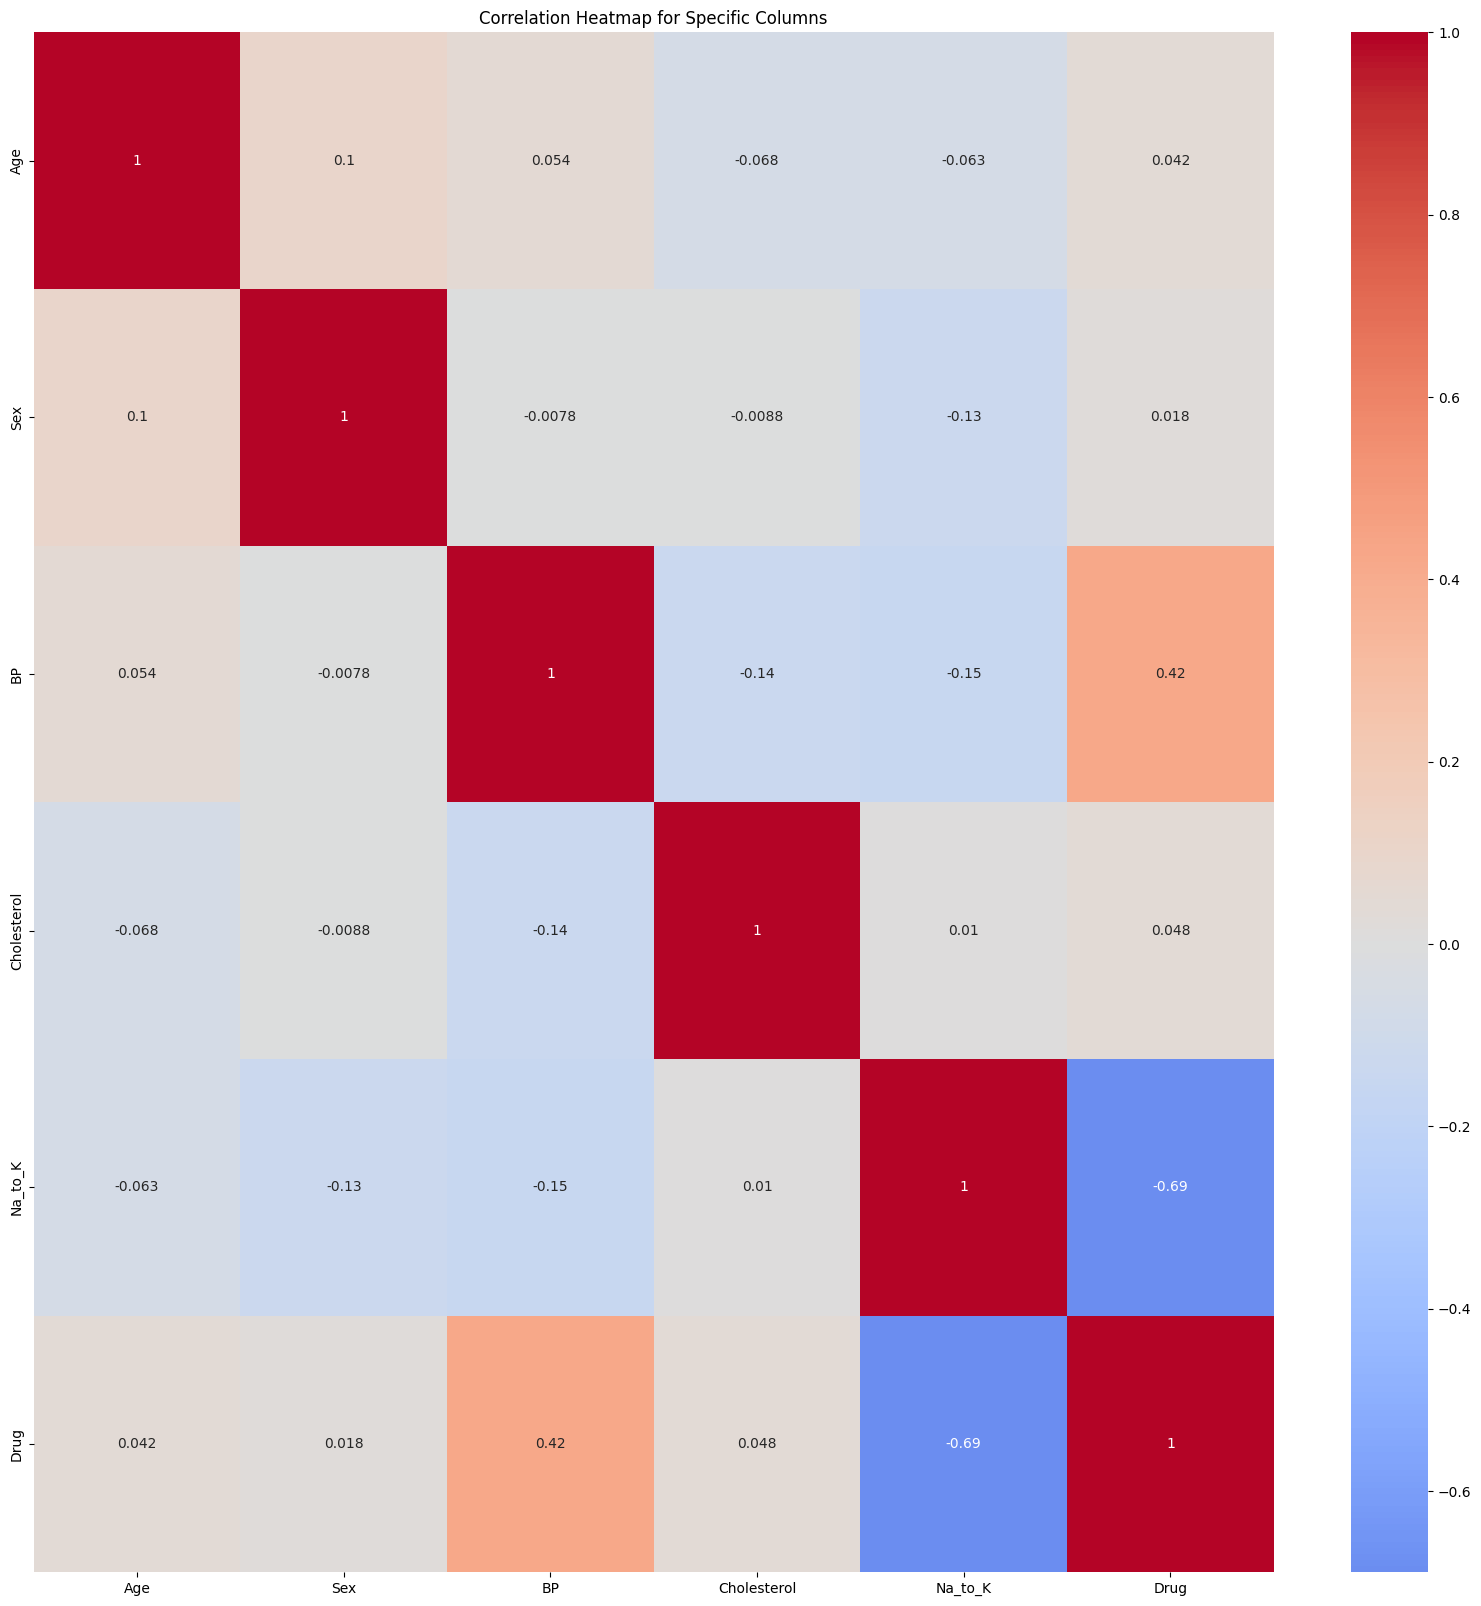

In [ ]:
# specific_columns =  list(df.columns)
# # specific_columns.append('fsr_tripFual')
# # Create a subset DataFrame with the specific columns
# subset_data = df[specific_columns]
# print(specific_columns)
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix for the specific columns
corr_matrix = data.corr()
print(corr_matrix)
# Create a figure and set its size
plt.figure(figsize=(20, 20))

# Plot the correlation heatmap for the specific columns
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)

# Show the plot
plt.title('Correlation Heatmap for Specific Columns')
plt.show()


### تقسيم البيانات

In [ ]:

# Splitting the data into training and test sets (80% train, 20% test)
X = data.drop('Drug', axis=1)
y = data['Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### تدريب الداتا

In [ ]:
# Logistic Regression Classifier
train = LogisticRegression(max_iter=50, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### تقييم المودل

In [ ]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.675


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0  0  0  0]
 [ 4  1  1  0  0]
 [ 0  0  3  0  0]
 [ 2  0  1  0  2]
 [ 2  0  1  0  8]]


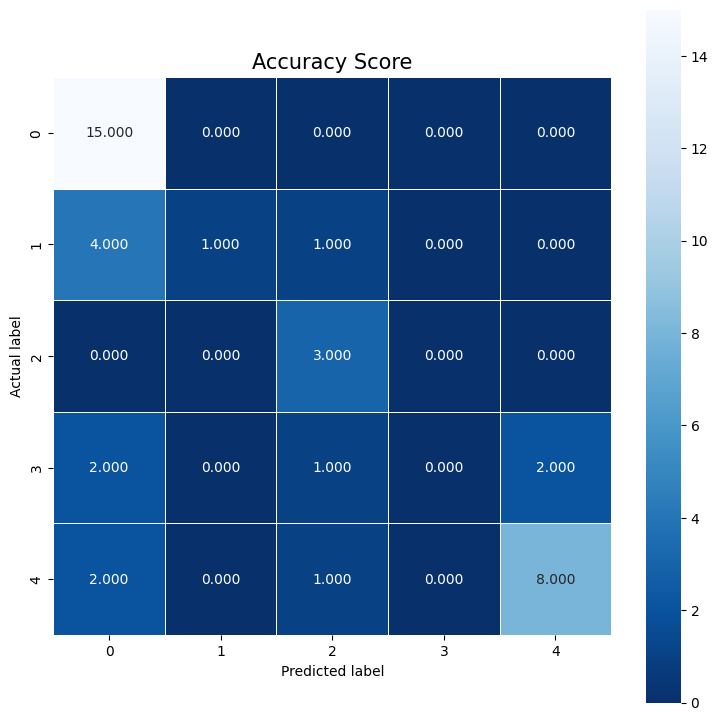

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

### تحسين المودل

In [ ]:
# Logistic Regression Classifier
train = LogisticRegression(max_iter=300, random_state=42)
train.fit(X_train, y_train)
y_pred = train.predict(X_test)
y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([4, 0, 4, 4, 0, 0, 0, 4, 1, 4, 1, 4, 0, 1, 2, 0, 2, 4, 4, 0, 2, 4,
       4, 0, 0, 0, 4, 4, 0, 4, 0, 3, 0, 0, 1, 0, 4, 1, 0, 1])

### تقييم المودل بعد التحسين

In [ ]:
# 5. Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("The accuarcy is : ",accuracy)

The accuarcy is :  0.91


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[15  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  3  0  0]
 [ 1  0  0  1  3]
 [ 0  0  0  0 11]]


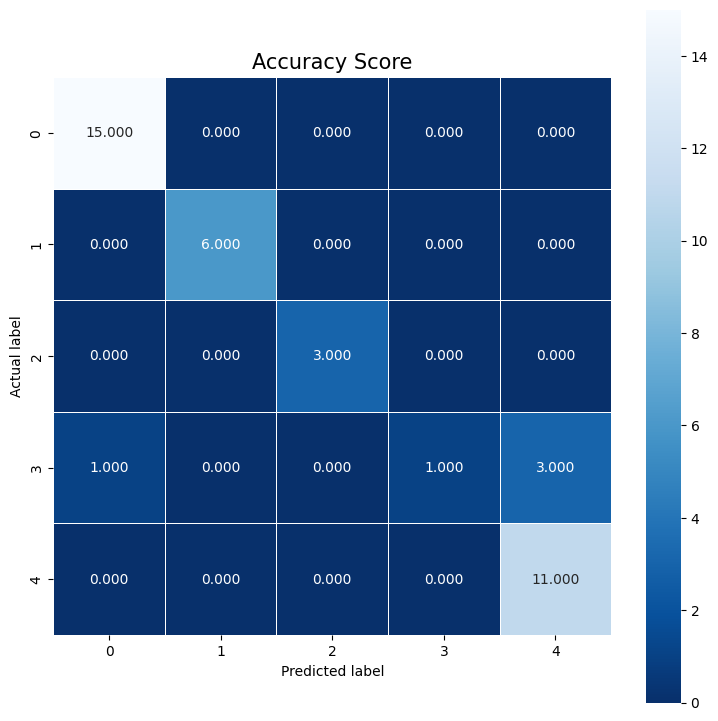

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

### حفظ المودل

In [ ]:
#

In [ ]:
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23.0,0,0,0,25.355,0
1,47.0,1,1,0,13.093,3
2,47.0,1,1,0,10.114,3
3,28.0,0,2,0,7.798,4
4,61.0,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56.0,0,1,0,11.567,3
196,16.0,1,1,0,12.006,3
197,52.0,1,2,0,9.894,4
198,23.0,1,2,1,14.020,4


In [ ]:
import joblib
model_filename = '/content/drive/MyDrive/الورشة/model_of _data.joblib'
joblib.dump(train, model_filename)
print(f"Model saved as {model_filename}")

Model saved as /content/drive/MyDrive/الورشة/model_of _data.joblib


### اختبار المودل

In [ ]:
# Load the saved model
import joblib
model_data = joblib.load(model_filename)


In [ ]:
    test = model_data.predict(X_test.head(1))
    test


array(['drugX'], dtype=object)


## الانحدار اللوجستي
هو خوارزمية تعلم آلي مشرف تُستخدم بشكل رئيسي لمهام التصنيف حيث الهدف هو التنبؤ باحتمالية أن ينتمي مثيل إلى فئة معينة أم لا. يعتبر نوعًا من الخوارزميات الإحصائية التي تحلل العلاقة بين مجموعة من المتغيرات المستقلة والمتغيرات الثنائية المعتمدة. وهو أداة قوية لاتخاذ القرار، مثل تصنيف البريد الإلكتروني كبريد غير مرغوب أو لا.

في الانحدار اللوجستي، بدلاً من ملاءمة خط انحدار، نقوم بملاءمة وظيفة شكل "S"، التي تتنبأ بقيمتين كحد أقصى (0 أو 1). يدل الانحناء الناتج عن الوظيفة اللوجستية على احتمالية حدوث شيء، مثل ما إذا كانت الخلايا سرطانية أم لا، أو ما إذا كان الفأر يعاني من السمنة من خلال وزنه، وما إلى ذلك.

وتُستخدم الوظيفة اللوجستية (أو الوظيفة السيجمويدية) لرسم القيم المتوقعة إلى احتمالات. يُستخدم مفهوم القيمة الحرجة في الانحدار اللوجستي، الذي يحدد احتمالية الصفر أو الواحد.

يُمكن تصنيف الانحدار اللوجستي إلى ثلاثة أنواع بناءً على الفئات: الثنائي (مثل النجاح أو الفشل)، والمتعدد (مثل "القط"، "الكلب"، "الخروف")، والترتيبي (مثل "منخفض"، "متوسط"، "عالي").

In [ ]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/الورشة/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
# dataset = pd.read_csv("/content/drive/MyDrive/الورشة/Clean_data")

# # Splitting the data into training and test sets (80% train, 20% test)
# X = data_encoded.drop('Drug', axis=1)
# y = data_encoded['Drug']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[65  3]
 [ 8 24]]


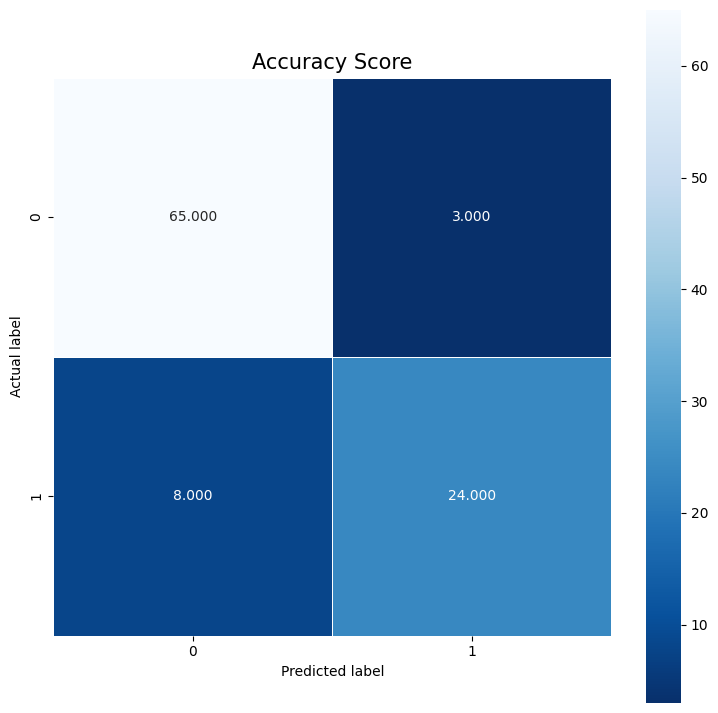

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

<ipython-input-290-230199fd3a97>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


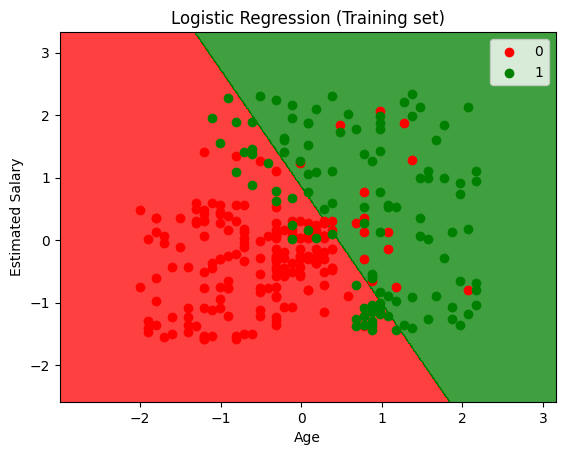

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-45-0183ff5708eb>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


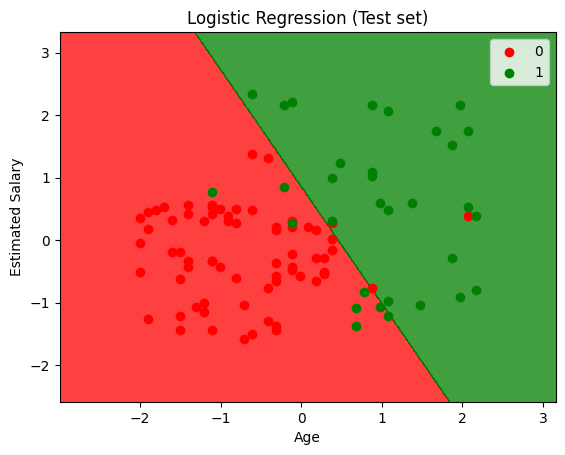

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

بالتأكيد، اليك شرحًا مفصلاً عن خوارزمية "أقرب الجيران" أو k-Nearest Neighbors (k-NN) في اللغة الإنجليزية:

## خوارزمية أقرب الجيران (k-NN):

### المقدمة:
خوارزمية k-NN هي خوارزمية تصنيف وتكوين بسيطة وغير معلمة تُستخدم في التعلم الآلي. الفكرة الرئيسية وراء الخوارزمية هي تصنيف العنصر الجديد على أساس كيفية قربه من العناصر في مجموعة البيانات التدريبية.

### الخطوات:

1. حدد عدد k من الجيران. عادةً، يتم اختيار قيمة فردية لـ k.
2. احسب المسافة بين النقطة التي ترغب في تصنيفها وجميع النقاط الأخرى في مجموعة البيانات.
3. حدد k نقاط من مجموعة البيانات التي هي الأقرب إلى النقطة التي تريد تصنيفها.
4. تحديد التصنيف الذي يكون له أغلبية الجيران بين الـ k جارًا (على سبيل المثال، إذا كان لديك 3 من الجيران تصنف كـ "قط" و2 تصنف كـ "كلب", فإن التصنيف النهائي سيكون "قط").

### المسافة:
هناك طرق متعددة لحساب المسافة، ولكن الأكثر استخدامًا هو المسافة اليوكليدية. وهناك أيضًا المسافة المانهاتن وغيرها.

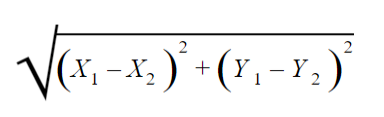


In [ ]:
# K-Nearest Neighbors (K-NN)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:

# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/الورشة/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


<ipython-input-298-9c8324b2b27b>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


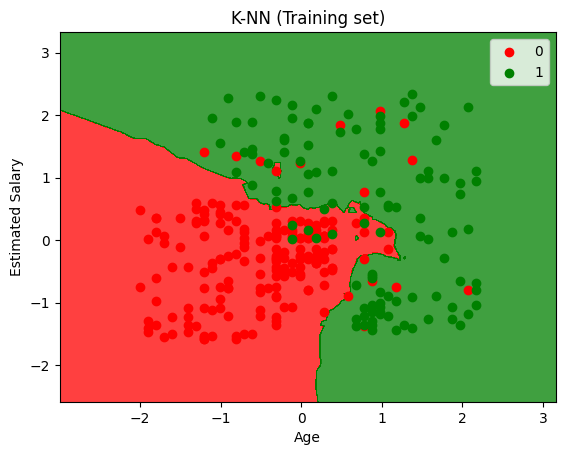

In [ ]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-299-e50db74cdf40>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


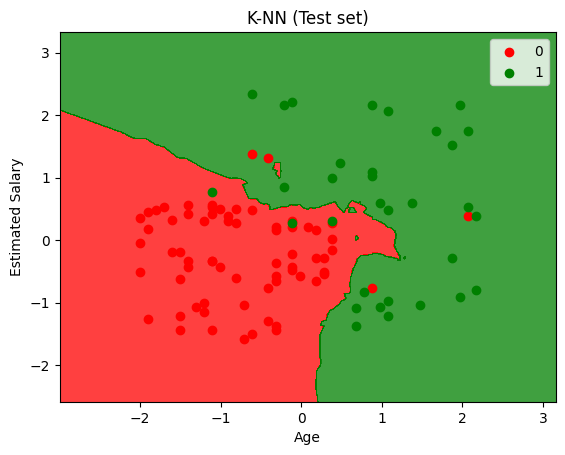

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## تعريف آلة المتجه الداعم (SVM)

1. **تعريف آلة المتجه الداعم (SVM)**:
   - آلة المتجه الداعم (SVM) هي نموذج تعلم آلي يُستخدم بشكل رئيسي في مشكلات التصنيف والانحدار. تعمل على البحث عن المتجه الذي يفصل بين البيانات إلى فئتين بأكبر هامش ممكن. في حالة البيانات غير القابلة للفصل الخطي، يمكن استخدام الأبعاد الأعلى للعثور على المتجه المثالي.

2. **استخدامات آلة المتجه الداعم**:
   - تُستخدم آلة المتجه الداعم في مجموعة واسعة من التطبيقات، بما في ذلك التصنيف والانحدار.

3. **مميزات آلة المتجه الداعم**:
   - توفير حلاً فعالاً للمشكلات التي تحتوي على عدد كبير من المتغيرات.
   - قدرتها على التعامل مع البيانات غير الخطية من خلال استخدام الأبعاد الأعلى.
   - تقديم حلاً للمشكلات التي تحتوي على عدد كبير من المتغيرات.
   - قدرتها على التعامل مع البيانات غير الخطية من خلال استخدام الأبعاد الأعلى.


3. **انواع آلة المتجه الداعم**:

1. **Linear SVM (آلة المتجه الداعم الخطي)**: هو نوع من SVM الذي يستخدم وظيفة خطية لتصنيف البيانات.
2. **Non Linear SVM (آلة المتجه الداعم غير الخطي)**: هو نوع من SVM الذي يستخدم وظائف غير خطية لتصنيف البيانات.


In [ ]:
# Kernel SVM

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/الورشة/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
print (classifier.score(X_test, y_test))

0.93


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [ 3 29]]


<ipython-input-307-cc92e8c75bb8>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


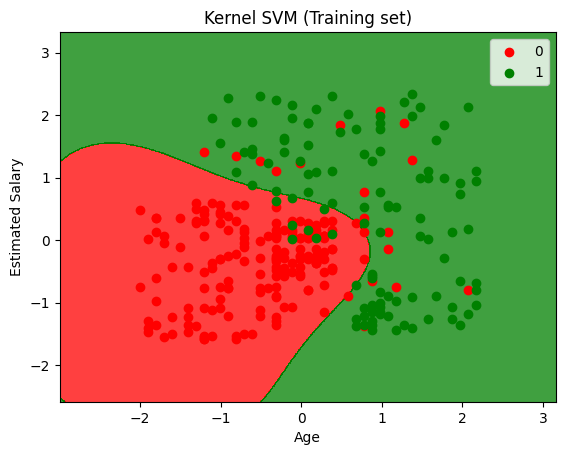

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-308-a65790561020>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


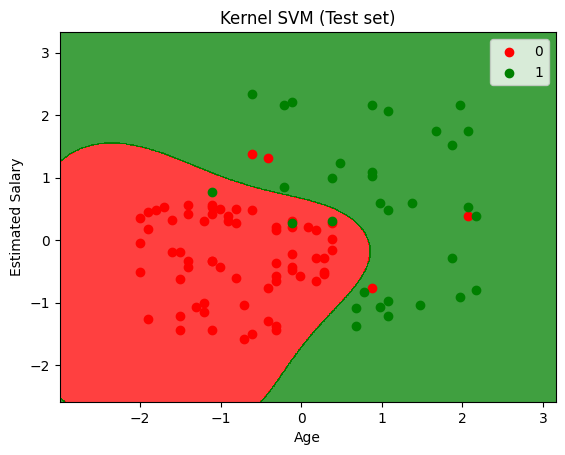

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


##شجرة القرار (Decision Tree):

**التعريف:**
شجرة القرار هي أحد الخوارزميات المستخدمة في التعلم الآلي وتستخدم بشكل رئيسي في مشكلات التصنيف، ولكن يمكن استخدامها أيضًا في مشكلات التنبؤ. تتكون شجرة القرار من عقد وأغصان. تمثل العقد الداخلية ميزة أو سمة من البيانات، وتمثل الأغصان القيم المختلفة لهذه السمات، والعقد النهائية تمثل الناتج أو القرار.

**كيف تعمل:**
1. تبدأ الشجرة بالعقدة الجذرية التي تمثل السمة الأكثر أهمية.
2. تقوم بفحص قيم هذه السمة وتقسيم البيانات بناءً على هذه القيم.
3. يتم تكرار هذه العملية لكل سمة حتى يتم التوصل إلى قرار نهائي.

**المزايا:**
- سهلة الفهم والتفسير.
- لا تحتاج إلى التحضير الكبير للبيانات.
- قادرة على التعامل مع البيانات الرقمية والفئوية.



In [ ]:
# Decision Tree Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/الورشة/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
# # Fitting Decision Tree Classification to the Training set
# from sklearn.ensemble import RandomForestClassifier
# classifier = RandomForestClassifier(n_estimators=100)
# classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Example classifier
# clf = RandomForestClassifier()

# Cross-validation (assuming X and y are your data and labels)
scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation

average_accuracy = scores.mean()
print(average_accuracy)

0.8074999999999999


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [ ]:

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[62  6]
 [ 3 29]]


<ipython-input-149-28b64e7b7ff6>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


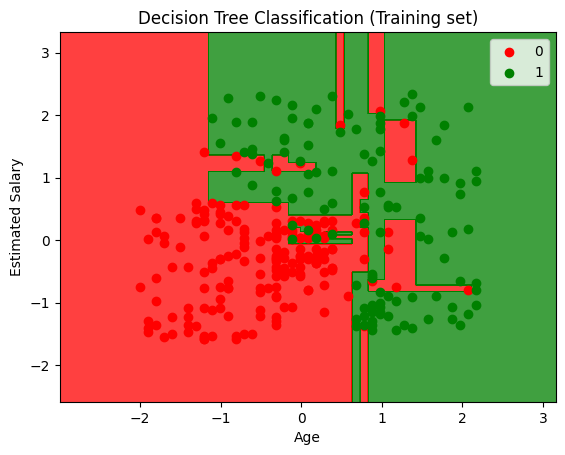

In [ ]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

<ipython-input-317-ddd7f47bf06d>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


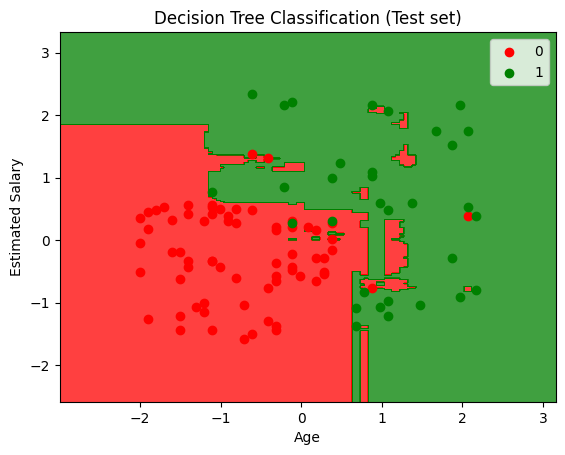

In [ ]:



# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## .,

التابع التكلفة (Cost Function) هو مفهوم أساسي في تعلم الآلة، خصوصًا في الخوارزميات التي تعتمد على التحسين التكراري. هو يقيس مدى بعد التنبؤات التي يقوم بها النموذج عن القيم الحقيقية.

لنقم بشرح هذا المفهوم بتفصيل:

### التابع التكلفة (Cost Function):

1. **الهدف:**
   - الهدف من التابع التكلفة هو قياس الفرق بين التنبؤات التي يقوم بها النموذج والقيم الحقيقية للبيانات. ببساطة، هو يقيس "تكلفة" أو "خطأ" النموذج.

2. **كيف يعمل:**
   - في سياق الانحدار الخطي، يتم استخدام تابع التكلفة المعروف باسم "Mean Squared Error (MSE)" وهو متوسط مربعات الأخطاء بين التنبؤات والقيم الحقيقية.
   - في سياق الانحدار اللوجستي، يتم استخدام تابع التكلفة المعروف باسم "Cross-Entropy Loss" أو "Log Loss".

3. **الاستخدام:**
   - بمجرد تحديد تابع التكلفة، يمكن استخدام تقنيات التحسين مثل "Gradient Descent" لتعديل المعلمات (parameters) للنموذج بهدف تقليل قيمة التكلفة.
   - الهدف هو الوصول إلى النموذج الذي يقلل من تابع التكلفة قدر الإمكان، مما يعني الحصول على أقل خطأ ممكن بين التنبؤات والقيم الحقيقية.


الانحدار التدريجي (Gradient Descent) هو أحد أشهر الخوارزميات المستخدمة لتحسين وتحديث المعلمات في النماذج التي تعتمد على التعلم الخاضع للإشراف. يتم استخدامه لتقليل قيمة تابع التكلفة.

لنقم بشرح هذا المفهوم بتفصيل:

### الانحدار التدريجي (Gradient Descent):

1. **الفكرة الأساسية:**
   - الهدف من الانحدار التدريجي هو الوصول إلى الحد الأدنى لتابع التكلفة (أو الخطأ) بتحديث المعلمات تدريجيًا في الاتجاه المعاكس للتدريج (المشتقة) لتابع التكلفة.

2. **كيف يعمل:**
   - تبدأ بتخصيص قيم عشوائية للمعلمات.
   - تحسب تابع التكلفة باستخدام القيم الحالية للمعلمات.
   - تحسب التدريج (المشتقة) لتابع التكلفة بالنسبة لكل معلم.
   - تقوم بتحديث المعلمات في الاتجاه المعاكس للتدريج باستخدام معدل تعلم محدد.
   - تكرر الخطوات السابقة حتى تصل إلى الحد الأدنى لتابع التكلفة أو حتى تحقق تقاربًا.

3. **الاستخدام:**
   - يُستخدم في تحسين العديد من النماذج في تعلم الآلة، مثل الانحدار الخطي والانحدار اللوجستي وشبكات العصبونات الاصطناعية.

### أمور يجب مراعاتها:

1. **معدل التعلم (Learning Rate):** هو معامل يحدد مدى كبر الخطوة التي نأخذها في كل تحديث. إذا كان معدل التعلم كبيرًا جدًا، فقد نتجاوز الحد الأدنى، وإذا كان صغيرًا جدًا، فقد يستغرق الأمر وقتًا طويلاً للتقارب.


في النهاية، الانحدار التدريجي هو أداة قوية لتحسين النماذج في تعلم الآلة، ولكن يجب استخدامه بحذر وفهم لضمان الحصول على أفضل نتائج.



## linear

### ما هي خوارزميّة التّوقّع الخطّيّ  ؟

هي خوارزميّة تعرف علاقة خطّيّة بين متغيّر مستقلّ ومتغيّر تابع، بهدف التنبّؤ بنتيجة الأحداث المستقبليّة.

وهي خوارزميّة تعلّم بالإشراف
 تحاكي العلاقة الرّياضيّة بين المتغيّرات، وتضع تنبّؤات للمتغيّرات المستمرّة أو الرّقميّة مثل المبيعات أو الرّاتب أو العمر أوسعر المنتج، وغيرها.
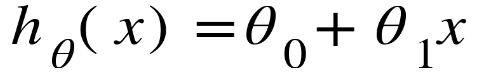



حيث أنّ :

 عوامل المعادلة: θ0و θ1   

عيّنة من البيانات: x

 النّتيجة المتوقّعة :hθ(x)

في أيّ مسألة توقّع خطّيّ يكون هدفنا بسيطًا:

بالنّظر إلى مجموعة التّدريب، نريد أن تتعلّم الدّالة h: x → y بحيث تكون (h (x توقعًا  جيدًّا مقابل القيمة الفعليّة y (أفضل علاقة خطّيّة ممكنة) كما هو موضّح في الشّكل التّالي:
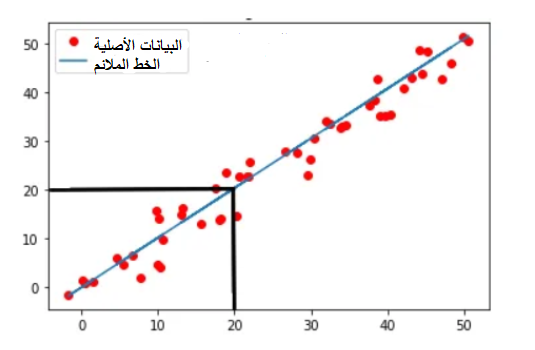

ولكن كيف نحدّد قيمة العوامل  θ0 و θ1 بحيث تحقّق أفضل علاقة خطّيّة best fit والملاءمة الأفضل ؟ الجواب أنّه علينا الاستعانة بتابع التّكلف

In [ ]:

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


%matplotlib inline
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7061,-118.02,33.93,35.0,2400.0,398.0,1218.0,408.0,4.1312,0
14689,-117.09,32.79,20.0,2183.0,534.0,999.0,496.0,2.8631,4
17323,-120.14,34.59,24.0,1601.0,282.0,731.0,285.0,4.2026,4
10056,-121.00,39.26,14.0,810.0,151.0,302.0,138.0,3.1094,1
15750,-122.45,37.77,52.0,3188.0,708.0,1526.0,664.0,3.3068,3
...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,0
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,1
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,0


### تدريب النموذج

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest regressor
rf_model = RandomForestRegressor(n_estimators=150,max_depth=50, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_rf_pred = rf_model.predict(X_test)

# Calculate the R^2 score for the Random Forest model on the test set
r2_score_rf = rf_model.score(X_test, y_test)
r2_score_rf


0.8067820785325317

In [ ]:

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
# Initialize the linear regression model with parameters
regressor=LinearRegression(fit_intercept=True,  copy_X=True, n_jobs=1)

regressor.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

### تقييم النموذج

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# For the test set
r2_test = r2_score(y_test, y_pred)
print(f"Test R^2: {r2_test}")


# For the test set
mae_test = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: {mae_test}")



Test R^2: 0.6196137788369984
Test MAE: 51621.48535377637
